In [744]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
%matplotlib inline

In [745]:
training = pd.read_csv('training_data.csv', encoding = "latin")
#training = pd.read_csv('test_data.csv', encoding = "latin")

In [746]:
training = training.fillna('NOTHING')

In [747]:
training['AVERAGE_CLOUDINESS'].value_counts()

NOTHING              2682
céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67
Name: AVERAGE_CLOUDINESS, dtype: int64

In [748]:
training.loc[training.AVERAGE_CLOUDINESS == 'céu claro', 'AVERAGE_CLOUDINESS'] = 'céu limpo'
training.loc[training.AVERAGE_CLOUDINESS == 'nuvens dispersas', 'AVERAGE_CLOUDINESS'] = 'nuvens quebradas'
training.loc[training.AVERAGE_CLOUDINESS == 'nuvens quebrados', 'AVERAGE_CLOUDINESS'] = 'nuvens quebradas'
training.loc[training.AVERAGE_CLOUDINESS == 'algumas nuvens', 'AVERAGE_CLOUDINESS'] = 'nuvens quebradas'
training.loc[training.AVERAGE_CLOUDINESS == 'tempo nublado', 'AVERAGE_CLOUDINESS'] = 'nublado'

In [749]:
training['AVERAGE_CLOUDINESS'].value_counts()

NOTHING              2682
nuvens quebradas     1745
céu limpo            1735
céu pouco nublado     516
nublado               134
Name: AVERAGE_CLOUDINESS, dtype: int64

In [750]:
training['AVERAGE_CLOUDINESS'] = pd.Categorical(training['AVERAGE_CLOUDINESS'])

In [751]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   city_name                6812 non-null   object  
 1   record_date              6812 non-null   object  
 2   AVERAGE_SPEED_DIFF       6812 non-null   object  
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64 
 4   AVERAGE_TIME_DIFF        6812 non-null   float64 
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64 
 6   LUMINOSITY               6812 non-null   object  
 7   AVERAGE_TEMPERATURE      6812 non-null   float64 
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 9   AVERAGE_HUMIDITY         6812 non-null   float64 
 10  AVERAGE_WIND_SPEED       6812 non-null   float64 
 11  AVERAGE_CLOUDINESS       6812 non-null   category
 12  AVERAGE_PRECIPITATION    6812 non-null   float64 
 13  AVERAGE_RAIN             6812 non-null   object  
dtypes: categ

In [752]:
training['record_date'] = pd.to_datetime(training['record_date'])
training['weekday'] = training['record_date'].dt.dayofweek
training['hour'] = training['record_date'].dt.hour
training['month'] = training['record_date'].dt.month
#training['year'] = training['record_date'].dt.year
#training['day'] = training['record_date'].dt.day

In [753]:
training['unique_id'] = training.index + 1

In [754]:
trainingWork = training.drop(['AVERAGE_PRECIPITATION','city_name','record_date','AVERAGE_RAIN','AVERAGE_SPEED_DIFF'],axis=1)
#trainingWork = training.drop(['AVERAGE_PRECIPITATION','city_name','record_date','AVERAGE_RAIN'],axis=1)

In [755]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,weekday,hour,month,unique_id
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NOTHING,0.0,NOTHING,3,7,8,1
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu limpo,0.0,NOTHING,4,14,8,2
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NOTHING,0.0,NOTHING,6,16,9,3
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu limpo,0.0,NOTHING,1,11,2,4
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NOTHING,0.0,NOTHING,3,12,6,5


In [756]:
dummied = trainingWork.copy()

In [757]:
dummied = pd.concat([dummied,pd.get_dummies(dummied['LUMINOSITY'])],axis='columns').drop(['LUMINOSITY'],axis='columns')

In [758]:
dummied.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,weekday,hour,month,unique_id,DARK,LIGHT,LOW_LIGHT
0,41.5,11.5,71.4,15.0,1019.0,100.0,3.0,NOTHING,3,7,8,1,0,1,0
1,41.7,48.3,87.4,21.0,1021.0,53.0,5.0,céu limpo,4,14,8,2,0,1,0
2,38.6,38.4,85.2,26.0,1014.0,61.0,4.0,NOTHING,6,16,9,3,0,1,0
3,37.4,61.0,94.1,18.0,1025.0,48.0,4.0,céu limpo,1,11,2,4,0,1,0
4,41.6,50.4,77.0,15.0,1008.0,82.0,10.0,NOTHING,3,12,6,5,0,1,0


In [759]:
naCloud = dummied[training['AVERAGE_CLOUDINESS'] == 'NOTHING']

cloud = dummied[training['AVERAGE_CLOUDINESS'] != 'NOTHING']


In [760]:
naCloud.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,weekday,hour,month,unique_id,DARK,LIGHT,LOW_LIGHT
0,41.5,11.5,71.4,15.0,1019.0,100.0,3.0,NOTHING,3,7,8,1,0,1,0
2,38.6,38.4,85.2,26.0,1014.0,61.0,4.0,NOTHING,6,16,9,3,0,1,0
4,41.6,50.4,77.0,15.0,1008.0,82.0,10.0,NOTHING,3,12,6,5,0,1,0
10,42.5,14.1,75.1,18.0,1015.0,100.0,1.0,NOTHING,6,22,8,11,1,0,0
11,46.8,2.4,75.5,14.0,1017.0,100.0,11.0,NOTHING,3,6,7,12,0,1,0


In [761]:
naCloud = naCloud.drop(['AVERAGE_CLOUDINESS'],axis=1)

In [762]:
X = cloud.drop(['AVERAGE_CLOUDINESS'],axis=1)

y = cloud['AVERAGE_CLOUDINESS']

In [763]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,weekday,hour,month,unique_id
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NOTHING,0.0,NOTHING,3,7,8,1
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu limpo,0.0,NOTHING,4,14,8,2
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NOTHING,0.0,NOTHING,6,16,9,3
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu limpo,0.0,NOTHING,1,11,2,4
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NOTHING,0.0,NOTHING,3,12,6,5


In [764]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 

In [765]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=2021,stratify=y)

In [766]:
#smote = SMOTE(sampling_strategy="not majority",random_state=2021)
#X_res, y_res = smote.fit_resample(X_train, y_train)

In [767]:
#sm = BorderlineSMOTE(random_state=2021,kind='borderline-2')
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [768]:
ros = RandomOverSampler(sampling_strategy="not majority",random_state=2021)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [769]:
#sm = SVMSMOTE(random_state=2021,sampling_strategy="not majority")
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [770]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [771]:
X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED']] = scaler.fit_transform(X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED']])
X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED']] = scaler.transform(X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED']])

<AxesSubplot:ylabel='AVERAGE_CLOUDINESS'>

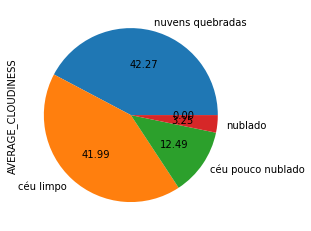

In [772]:
y_train.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='AVERAGE_CLOUDINESS'>

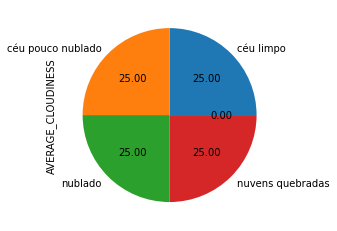

In [773]:
y_res.value_counts().plot.pie(autopct='%.2f')

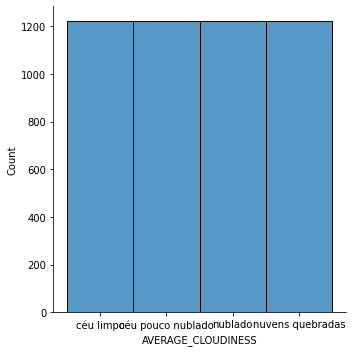

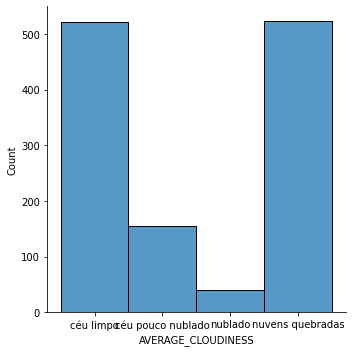

In [774]:
sns.displot(y_res)
sns.displot(y_test)

In [775]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [776]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
#cv = cross_val_score(gnb,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [777]:
lr = LogisticRegression(random_state=2021,max_iter = 90000000000000)
#cv = cross_val_score(lr,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [778]:
dt = tree.DecisionTreeClassifier(random_state=2021)
#cv = cross_val_score(dt,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [779]:
knn = KNeighborsClassifier()
#cv = cross_val_score(knn,X_res.values,y_res.values,cv=5)
#print(cv)
#print(cv.mean())

In [780]:
rf = RandomForestClassifier(random_state=2021)
cv = cross_val_score(rf,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.8803681  0.89161554 0.89059305 0.89150461 0.89457523]
0.8897313046699864


In [781]:
svc = SVC(probability = True,random_state=2021)
#cv = cross_val_score(svc,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [782]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2021)
#cv = cross_val_score(xgb,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [783]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [784]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [785]:
'''
param_grid = {'max_iter' : [200000000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_res,y_res)
clf_performance(best_clf_lr,'Logistic Regression')
'''

"\nparam_grid = {'max_iter' : [200000000],\n              'penalty' : ['l1', 'l2'],\n              'C' : np.logspace(-4, 4, 20),\n              'solver' : ['liblinear']}\n\nclf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_lr = clf_lr.fit(X_res,y_res)\nclf_performance(best_clf_lr,'Logistic Regression')\n"

In [786]:
'''
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_res,y_res.values)
clf_performance(best_clf_knn,'KNN')
'''

"\nparam_grid = {'n_neighbors' : [3,5,7,9],\n              'weights' : ['uniform', 'distance'],\n              'algorithm' : ['auto', 'ball_tree','kd_tree'],\n              'p' : [1,2]}\nclf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_knn = clf_knn.fit(X_res,y_res.values)\nclf_performance(best_clf_knn,'KNN')\n"

In [787]:
param_grid =  {'n_estimators': [100,200,500,1000],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf = RandomizedSearchCV(rf, param_distributions= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest
Best Score: 0.8932094617930184
Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 75, 'criterion': 'gini', 'bootstrap': False}


In [788]:
param_grid =  {'n_estimators': [550],
               'min_samples_split': [2],
               'min_samples_leaf': [1],
               'max_features': ['sqrt'],
               'max_depth': [50],
               'criterion': ['entropy'],
               'bootstrap': [False]}
                                  
clf_rf = GridSearchCV(rf, param_grid= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Random Forest
Best Score: 0.905894887106936
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 550}


In [789]:
'''
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]

clf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_res,y_res)
clf_performance(best_clf_svc,'SVC')
'''

"\nparam_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],\n                                  'C': [.1, 1, 10, 100, 1000]},\n                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},\n                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]\n\nclf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_svc = clf_svc.fit(X_res,y_res)\nclf_performance(best_clf_svc,'SVC')\n"

<AxesSubplot:>

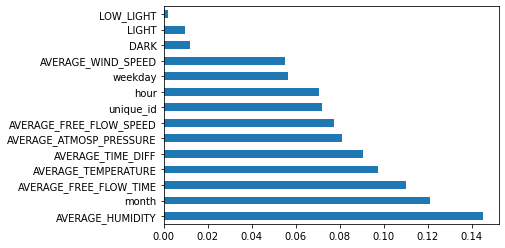

In [790]:
best_rf = best_clf_rf.best_estimator_.fit(X_res,y_res)
feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [791]:
'''
param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_res,y_res)
clf_performance(best_clf_xgb,'XGB')
'''

"\nparam_grid = {\n    'n_estimators': [450,500,550],\n    'colsample_bytree': [0.75,0.8,0.85],\n    'max_depth': [None],\n    'reg_alpha': [1],\n    'reg_lambda': [2, 5, 10],\n    'subsample': [0.55, 0.6, .65],\n    'learning_rate':[0.5],\n    'gamma':[.5,1,2],\n    'min_child_weight':[0.01],\n    'sampling_method': ['uniform']\n}\n\nclf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_xgb = clf_xgb.fit(X_res,y_res)\nclf_performance(best_clf_xgb,'XGB')\n"

In [792]:
#lr.fit(X_res,y_res)
#dt.fit(X_res,y_res)
#knn.fit(X_res,y_res)
rf.fit(X_res,y_res)
#xgb.fit(X_res,y_res)

RandomForestClassifier(random_state=2021)

In [793]:
predictions2 = rf.predict(X_test)

In [794]:
predictions = best_clf_rf.predict(X_test)

In [795]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [796]:
#ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

In [797]:
#ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

In [798]:
#ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

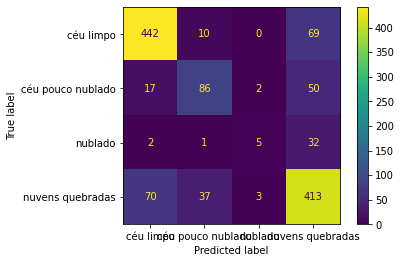

In [799]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

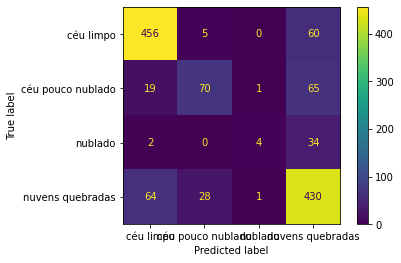

In [800]:
ConfusionMatrixDisplay.from_estimator(best_clf_rf, X_test, y_test)

In [801]:
#ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

In [802]:
testing = naCloud

In [803]:
testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED']] = scaler.transform(testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED']])

In [804]:
prediction = best_clf_rf.predict(testing)

In [805]:
prediction

array(['nuvens quebradas', 'céu limpo', 'nuvens quebradas', ...,
       'nuvens quebradas', 'céu pouco nublado', 'céu limpo'], dtype=object)

In [806]:
naCloud['AVERAGE_CLOUDINESS'] = prediction

In [807]:
naCloud.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,weekday,hour,month,unique_id,DARK,LIGHT,LOW_LIGHT,AVERAGE_CLOUDINESS
0,0.239955,-0.399855,-1.152071,-0.257784,0.231773,1.150262,0.050400,3,7,8,1,0,1,0,nuvens quebradas
2,-0.455573,0.387007,0.447724,2.095645,-0.726532,-1.330848,0.558348,6,16,9,3,0,1,0,céu limpo
4,0.263939,0.738023,-0.502879,-0.257784,-1.876498,0.005134,3.606040,3,12,6,5,0,1,0,nuvens quebradas
10,0.479793,-0.323801,-0.723141,0.384060,-0.534871,1.150262,-0.965497,6,22,8,11,1,0,0,nuvens quebradas
11,1.511094,-0.666042,-0.676770,-0.471732,-0.151549,1.150262,4.113988,3,6,7,12,0,1,0,nuvens quebradas


In [808]:
test = pd.concat([naCloud, cloud], ignore_index=True).sort_values(by='unique_id',ascending=True)

In [809]:
test.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,weekday,hour,month,unique_id,DARK,LIGHT,LOW_LIGHT,AVERAGE_CLOUDINESS
0,0.239955,-0.399855,-1.152071,-0.257784,0.231773,1.150262,0.050400,3,7,8,1,0,1,0,nuvens quebradas
2682,41.700000,48.300000,87.400000,21.000000,1021.000000,53.000000,5.000000,4,14,8,2,0,1,0,céu limpo
1,-0.455573,0.387007,0.447724,2.095645,-0.726532,-1.330848,0.558348,6,16,9,3,0,1,0,céu limpo
2683,37.400000,61.000000,94.100000,18.000000,1025.000000,48.000000,4.000000,1,11,2,4,0,1,0,céu limpo
2,0.263939,0.738023,-0.502879,-0.257784,-1.876498,0.005134,3.606040,3,12,6,5,0,1,0,nuvens quebradas


In [810]:
final = test[['unique_id','AVERAGE_CLOUDINESS']]

In [811]:
final.head()

,unique_id,AVERAGE_CLOUDINESS
0,1,nuvens quebradas
2682,2,céu limpo
1,3,céu limpo
2683,4,céu limpo
2,5,nuvens quebradas


In [812]:
training = training.drop(['AVERAGE_CLOUDINESS'],axis=1)

In [813]:
training = training.merge(final,on='unique_id',how='left')

In [814]:
training = training.drop(['unique_id','weekday','hour','month'],axis=1)

In [815]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,AVERAGE_RAIN,AVERAGE_CLOUDINESS
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,0.0,NOTHING,nuvens quebradas
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,0.0,NOTHING,céu limpo
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,0.0,NOTHING,céu limpo
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,0.0,NOTHING,céu limpo
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,0.0,NOTHING,nuvens quebradas


In [816]:
training.to_csv('cloudTrain.csv',index=False)
#training.to_csv('cloudTest.csv',index=False)